In [1]:
"""
Build the Image classification model by dividing the model into the following fourstages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance
"""

'\nBuild the Image classification model by dividing the model into the following fourstages:\na. Loading and preprocessing the image data\nb. Defining the model’s architecture\nc. Training the model\nd. Estimating the model’s performance\n'

In [2]:
# Importing required packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# a. Loading and preprocessing the image data

mnist=tf.keras.datasets.mnist
# Splitting into training and testing data
(x_train,y_train),(x_test,y_test) = mnist.load_data()
input_shape = (28,28,1)


In [4]:
# Making sure that the values are float so that we can getdecimal points after division
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
# print("Data type of x_train:", x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# print("Data type after converting to float:", x_train.dtype)

In [6]:
# Normalizing the RGB codes by divinding it into the max RGB value.
x_train = x_train / 255
x_test = x_test / 255
print("Shape of training : ", x_train.shape)
print("Shape of testing : ", x_test.shape)


Shape of training :  (60000, 28, 28, 1)
Shape of testing :  (10000, 28, 28, 1)


In [7]:
# b. Defining the model’s architecture
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation = "relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [8]:
# c. Training the model
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1965 - accuracy: 0.9409
Epoch 2/2
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0784 - accuracy: 0.9759


In [9]:
# d. Estimating the model’s performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9808
Loss=0.058
Accuracy=0.981


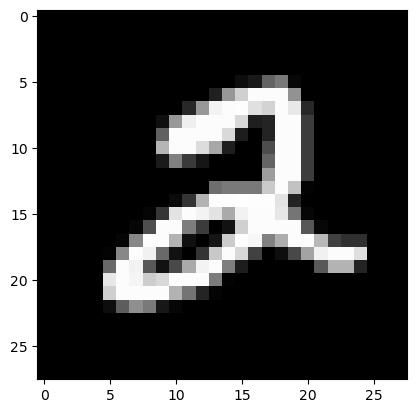

In [10]:
# Showing image at positions[] from dataset: 
image = x_train[5]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [11]:
# Predicting the class of image :
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class {}:" .format(np.argmax(predict_model)))

1/1 [==============================] - 0s 94ms/step
Predicted class 2:
